# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,NaN,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,NaN,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9988 non-null   object 
 7   Category      9991 non-null   object 
 8   Sub-Category  9988 non-null   object 
 9   Sales         9990 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# 1-Handling missing data

In [4]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points 
missing_values_count

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          6
Category        3
Sub-Category    6
Sales           4
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# replace all the null value in numerical columns with the average and for categorcial columns with mode
data_clean = data.copy()
data_clean.Region = data.Region.fillna(data.Region.mode()[0])
data_clean.Category = data.Category.fillna(data.Category.mode()[0])
data_clean['Sub-Category'] = data['Sub-Category'].fillna(data['Sub-Category'].mode()[0])
data_clean.Sales = data.Sales.fillna(data.Sales.mean())
data_clean.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Office Supplies,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data_clean.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# 2-Encoding Categorical Data

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
y = data_clean.iloc[:, -1].values
data_clean.drop("Profit",axis=1,inplace = True)
X = data_clean.iloc[:, 0:].values
X.shape

(9994, 12)

In [8]:
X[0]

array(['Second Class', 'Consumer', 'United States', 'Henderson',
       'Kentucky', 42420, 'South', 'Furniture', 'Bookcases', 261.96, 2,
       0.0], dtype=object)

In [9]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,4,6,7,8])], remainder='passthrough')
X =ct.fit_transform(X).toarray()

In [10]:
print(X.shape)
print(y.shape)

(9994, 616)
(9994,)


# 3-Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scalled = scaler.transform(X)

# 4-Splitting the dataset into training and test sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scalled, y, test_size=0.2, random_state=0)

# 5-Decision Tree Regression

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [14]:
import sklearn.metrics as sm
Y_pred = model.predict(X_train)
print("Mean absolute error train =", round(sm.mean_absolute_error(Y_train, Y_pred), 2)) 
print("Mean squared error train=", round(sm.mean_squared_error(Y_train, Y_pred), 2)) 
print("Median absolute error train=", round(sm.median_absolute_error(Y_train, Y_pred), 2)) 
print("Explain variance score train=", round(sm.explained_variance_score(Y_train, Y_pred), 2)) 
print("R2 score train=", round(sm.r2_score(Y_train, Y_pred), 2))
#An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

Mean absolute error train = 0.01
Mean squared error train= 0.51
Median absolute error train= 0.0
Explain variance score train= 1.0
R2 score train= 1.0


In [17]:
import sklearn.metrics as sm
Y_pred = model.predict(X_test)
print("Mean absolute error train =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error train=", round(sm.mean_squared_error(Y_test, Y_pred), 2)) 
print("Median absolute error train=", round(sm.median_absolute_error(Y_test, Y_pred), 2)) 
print("Explain variance score train=", round(sm.explained_variance_score(Y_test, Y_pred), 2)) 
print("R2 score train=", round(sm.r2_score(Y_test, Y_pred), 2))
#An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

Mean absolute error train = 29.74
Mean squared error train= 34706.46
Median absolute error train= 1.62
Explain variance score train= 0.6
R2 score train= 0.6


## Visualising the Decision Tree results

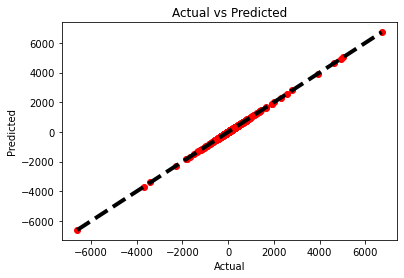

In [15]:
# Plotting actual vs predicted values
# Predict the target values
Y_pred = model.predict(X_train)
plt.scatter(Y_train, Y_pred, color='red')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

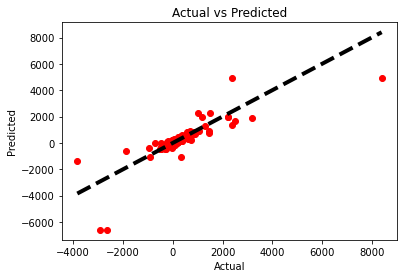

In [18]:
# Plotting actual vs predicted values
# Predict the target values 
# for test
Y_pred = model.predict(X_test)
plt.scatter(Y_test, Y_pred, color='red')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()